In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import (
    get_tukey_spectrum_amplitude,
    get_sn_amplitude,
)
from positioning.sound_db import ReflectCeilingDB
from positioning import tools

In [3]:
plt.style.use(["science", "notebook"])

In [4]:
db = ReflectCeilingDB("../data/reference-reflect-ceiling")

In [6]:
true_pos = pd.read_csv("../data/pos-reflect-ceiling/measure-points.csv", index_col=0)
true_pos.head()

,x,y,z
p28,-0.25,1.25,1.00
p29,0.25,1.25,1.00
p30,-0.25,1.75,1.00
p31,0.25,1.75,1.00
p32,-0.25,1.25,1.25


In [8]:
est_poses = []
errors = []
for i, true in true_pos.iterrows():
    test_signal = readwav(f"../data/pos-reflect-ceiling/{i}.wav")[:, 1]
    err = []
    pos = []
    for j in range(50):
        est_pos = np.ravel(db.positioning(test_signal[j * 96000 : (j + 2) * 96000]))
        pos.append(est_pos)
        err.append(np.linalg.norm(est_pos - true))
    est_poses.append(pos)
    errors.append(err)

In [9]:
df_est = pd.DataFrame()
for i in range(12):
    df_est_pos = pd.DataFrame(est_poses[i], columns=["x", "y", "z"])
    df_est_pos["error"] = errors[i]
    df_est_pos["test_position"] = f"test{i}"
    df_est = pd.concat([df_est, df_est_pos])
df_est.reset_index(inplace=True, drop=True)

In [10]:
df_est.head()

,x,y,z,error,test_position
0,-0.20,1.87,0.61,0.734166,test0
1,-0.21,1.86,0.62,0.719792,test0
2,-0.20,1.89,0.61,0.751132,test0
3,-0.17,1.93,0.62,0.783071,test0
4,-0.24,1.78,0.62,0.652227,test0


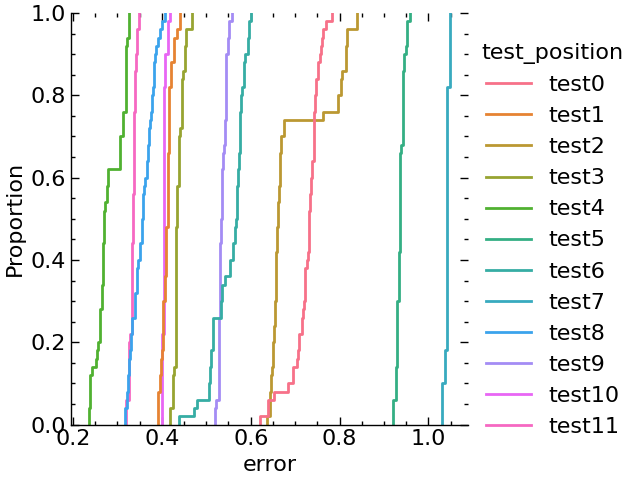

In [11]:
sns.displot(df_est, x="error", hue="test_position", kind="ecdf")

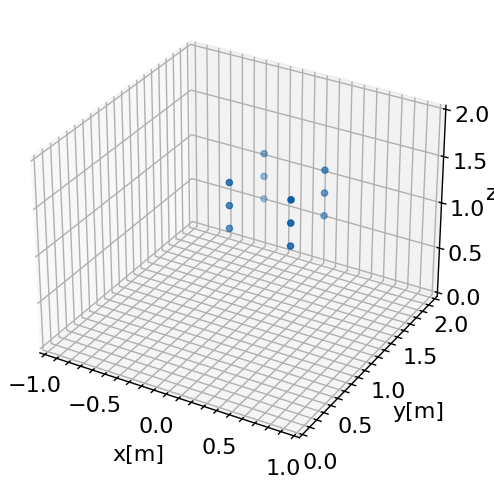

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(true_pos["x"], true_pos["y"], true_pos["z"])
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.set_zlim(0, 2)
ax.set_xlabel("x[m]", labelpad=10)
ax.set_ylabel("y[m]", labelpad=10)
ax.set_zlabel("z[m]", labelpad=10)
fig.subplots_adjust(right=2)

In [13]:
db_pos = pd.read_csv(
    "../data/reference-reflect-ceiling/measure_points.csv", index_col=0
)

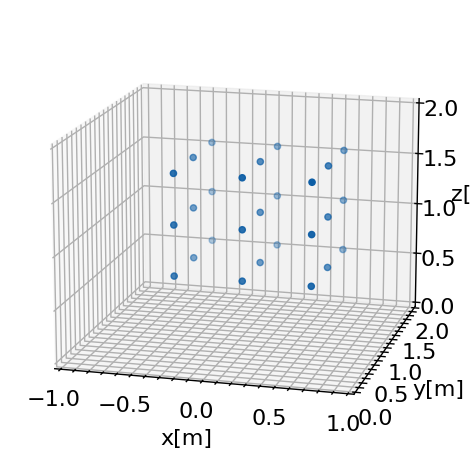

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(db_pos["x"], db_pos["y"], db_pos["z"])
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.set_zlim(0, 2)
ax.set_xlabel("x[m]", labelpad=10)
ax.set_ylabel("y[m]", labelpad=10)
ax.set_zlabel("z[m]", labelpad=10)
fig.subplots_adjust(right=2)
ax.view_init(elev=15, azim=-75)

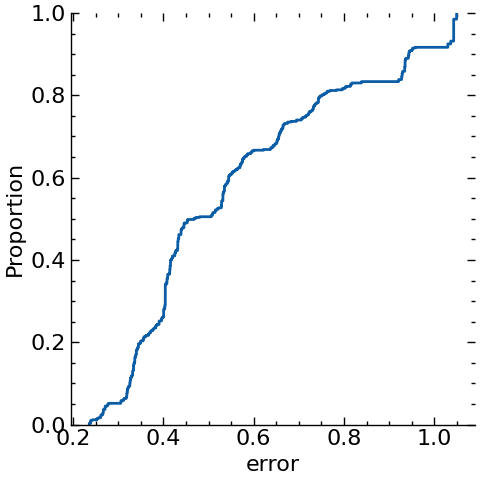

In [16]:
sns.displot(df_est, x="error", kind="ecdf")

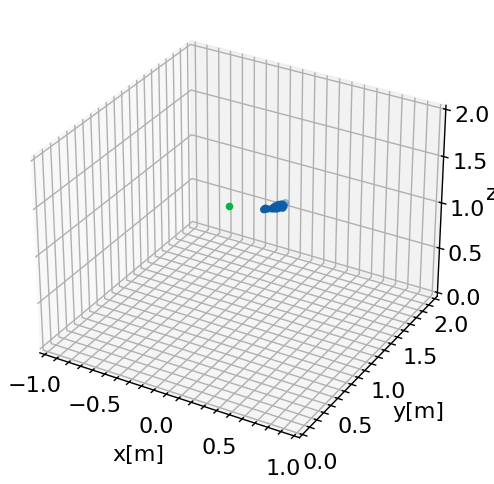

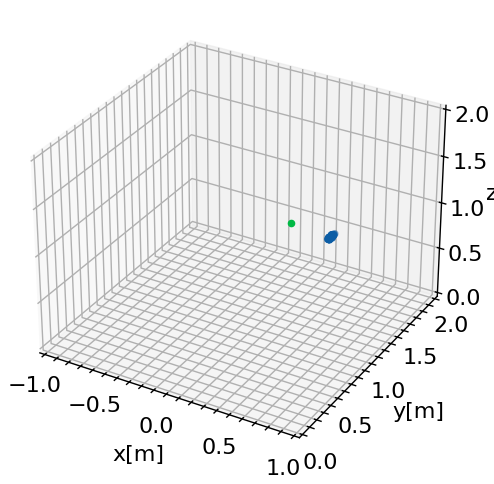

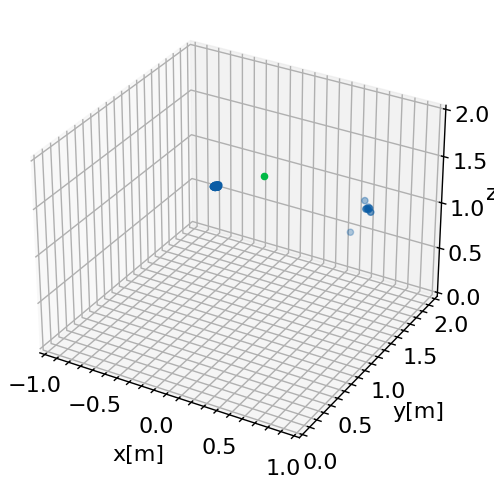

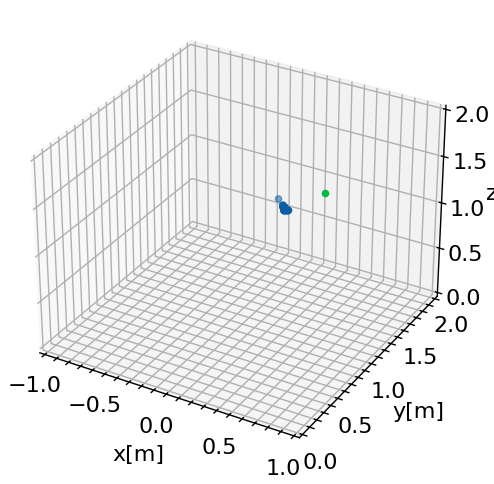

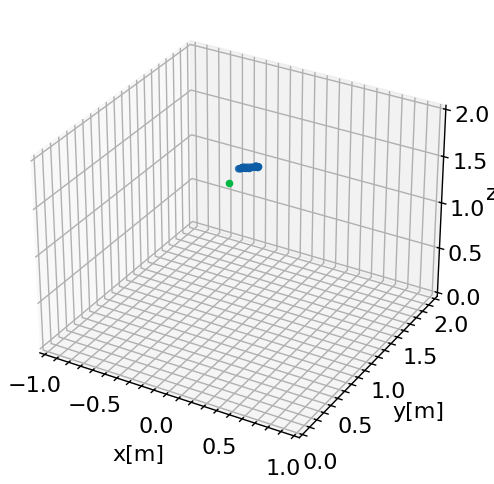

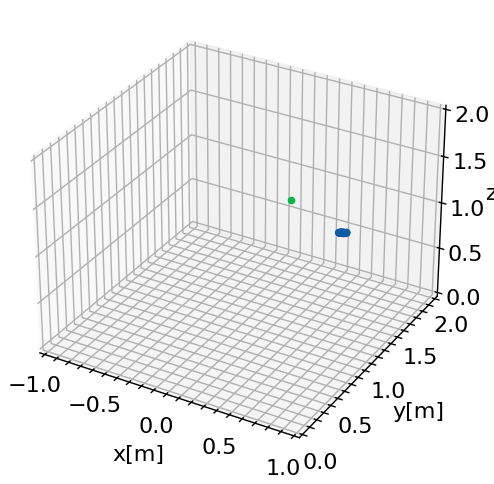

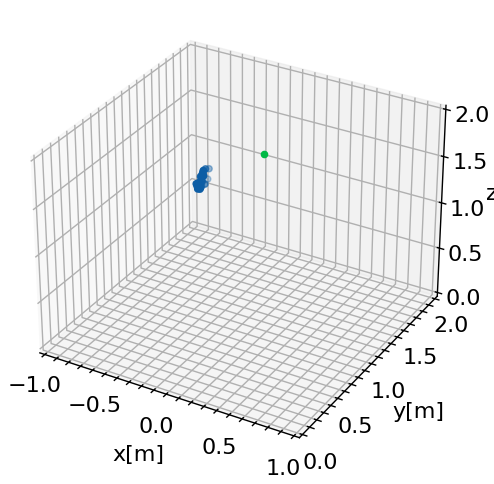

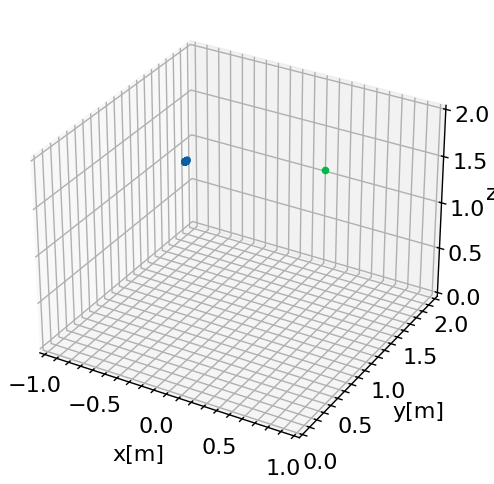

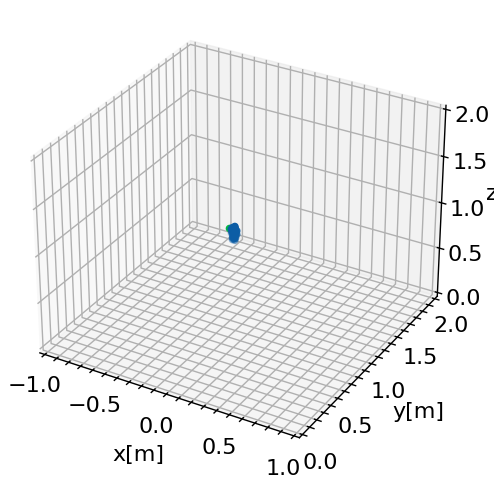

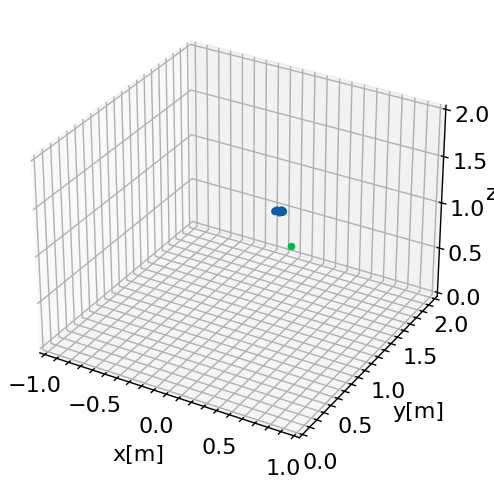

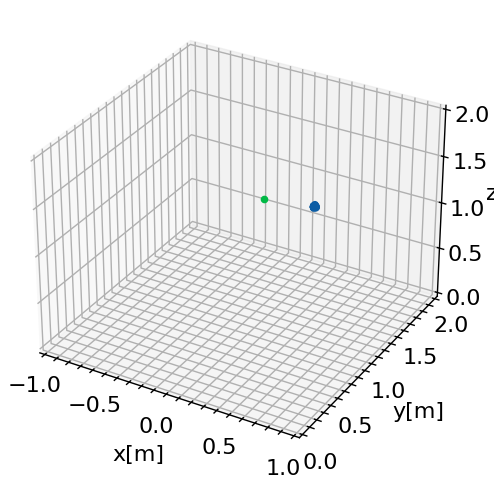

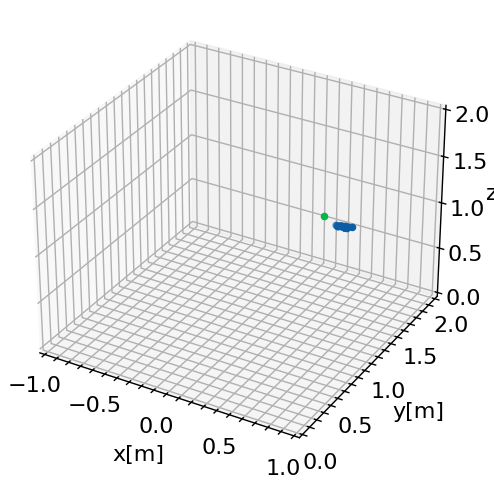

In [21]:
for i in range(12):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 2)
    ax.set_zlim(0, 2)
    ax.set_xlabel("x[m]", labelpad=10)
    ax.set_ylabel("y[m]", labelpad=10)
    ax.set_zlabel("z[m]", labelpad=10)
    fig.subplots_adjust(right=2)
    cur = df_est[df_est["test_position"] == f"test{i}"]
    ax.scatter(cur["x"], cur["y"], cur["z"])
    ax.scatter(true_pos.iloc[i]["x"], true_pos.iloc[i]["y"], true_pos.iloc[i]["z"])
    plt.show()